# Caso de estudo: Aluguel de Imóveis do Rio de Janeiro

## Objetivo
O objetivo desta análise exploratória é investigar os principais fatores que influenciam os preços de aluguel no Rio de Janeiro. Através da análise de diferentes características dos imóveis, como tipo, tamanho e localização, buscamos identificar padrões e relações que possam explicar as variações nos valores de aluguel. Essa análise visa proporcionar uma compreensão mais clara do mercado imobiliário local, ajudando na tomada de decisões para quem deseja entender melhor as dinâmicas de precificação na cidade.

## Obtenção dos dados
Os dados utilizados foram fornecidos como parte do material de um curso da plataforma Alura.

## Descrição dos dados
Bairro: Localização do imóvel<br>
Tipo de Imóvel: Categoria do imóvel, como casa, apartamento, quitinete, entre outros<br>
Características do Imóvel: Número de quartos, suítes e vagas na garagem<br>
Valor do Aluguel: Preço mensal cobrado pelo aluguel<br>
Valor do Condomínio: Custo do condomínio, quando aplicável<br>
Valor do IPTU: Imposto Predial e Territorial Urbano, quando necessário<br>

## Formato
Arquivos CSV

## Qualidade dos dados
Possível presença de dados faltantes para alguns bairros.
Informações duplicadas de anúncios semelhantes.


## Configurando ambiente de trabalho

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenção e visualização inicial dos dados

In [63]:
df = pd.read_csv('dados/aluguel.csv', sep= ';')
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Limpeza dos dados

In [64]:
print(df.isnull().sum())

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64


No tratamento dos dados, permitimos linhas sem valor na coluna "Condômino", pois há tipos de imóveis que não se enquadram como condomínios. No entanto, a coluna "Valor" não pode ter valores vazios, portanto as linhas com valores ausentes na coluna "Valor" serão removidas.<br>
A coluna IPTU também será removida pois não será usada na nossa análise.

In [65]:
df = df.dropna(subset=['Valor'])
df = df[df['Area'] != 0]

In [66]:
df = df.drop(columns=['IPTU'])
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0
...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0


## Removendo outliners

In [67]:
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1

limiteInferior = Q1 - 1.5 * IQR
limiteSuperior = Q3 + 1.5 * IQR

df = df[(df['Valor'] >= limiteInferior) & (df['Valor'] <= limiteSuperior)]

df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0
...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0


### - Qual é a precificação média por metro quadrado (R$/m²) dos imóveis por bairro?

In [68]:
df['Valor m2'] = df['Valor'] / df['Area']
df

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_6988\636354554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor m2'] = df['Valor'] / df['Area']


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,70.000000
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,34.666667
3,Apartamento,Centro,1,0,0,15,800.0,390.0,53.333333
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,16.666667
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,29.629630
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,23.076923
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,29.166667
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,42.857143


In [69]:
mediaValorm2Bairro = df.groupby('Bairro')['Valor m2'].mean().round(2)
mediaValorm2Bairro

Bairro
Abolição             26.98
Alto da Boa Vista    12.91
Anchieta             12.49
Andaraí              21.28
Anil                 21.00
                     ...  
Vila Valqueire       19.18
Vila da Penha        23.31
Vista Alegre         16.94
Zumbi                27.19
Água Santa           16.02
Name: Valor m2, Length: 160, dtype: float64

### Quais bairros tem a média de m^2 mais alta e mais baixa?

In [70]:
valorm2Max = mediaValorm2Bairro.max()
bairroValorm2Max = mediaValorm2Bairro.idxmax()

valorm2Min = mediaValorm2Bairro.min()
bairroValorm2Min = mediaValorm2Bairro.idxmin()

# Exibir o resultado
print(f'O maior valor médio por m² é {valorm2Max:.2f} no bairro {bairroValorm2Max}')
print(f'O menor valor médio por m² é {valorm2Min:.2f} no bairro {bairroValorm2Min}')

O maior valor médio por m² é 122.95 no bairro Itaguaí
O menor valor médio por m² é 10.14 no bairro Vigário Geral


### Qual é o valor médio do aluguel por bairro?

In [71]:
aluguelMedioPorBairro = df.groupby('Bairro')['Valor'].mean().round(2)
aluguelMedioPorBairro

Bairro
Abolição             2005.45
Alto da Boa Vista    1760.00
Anchieta             1521.82
Andaraí              1768.94
Anil                 2339.17
                      ...   
Vila Valqueire       1696.32
Vila da Penha        1440.75
Vista Alegre         1128.64
Zumbi                3610.00
Água Santa           1083.33
Name: Valor, Length: 160, dtype: float64

### ### Quais bairros tem o aluguel médio mais alto e mais baixo?

In [72]:
aluguelMedioPorBairroMax = aluguelMedioPorBairro.max()
bairroAluguelMedioMax = aluguelMedioPorBairro.idxmax()
aluguelMedioPorBairroMin = aluguelMedioPorBairro.min()
bairroAluguelMedioMin = aluguelMedioPorBairro.idxmin()

print(f'O maior aluguel médio é {aluguelMedioPorBairroMax} no bairro {bairroAluguelMedioMax}')
print(f'O menor aluguel médio é {aluguelMedioPorBairroMin} no bairro {bairroAluguelMedioMin}')

O maior aluguel médio é 12000.0 no bairro Cidade Jardim
O menor aluguel médio é 580.0 no bairro Paciência


### Como o preço do aluguel varia entre as diferentes regiões da cidade (Sul, Norte, Oeste, Centro)?

In [73]:
print(df['Bairro'].unique())

['Copacabana' 'Jardim Botânico' 'Barra da Tijuca' 'Centro' 'Higienópolis'
 'Vista Alegre' 'Cachambi' 'Ramos' 'Grajaú' 'Lins de Vasconcelos'
 'Botafogo' 'Taquara' 'Freguesia (Jacarepaguá)' 'Tijuca' 'Olaria' 'Leblon'
 'São Cristóvão' 'Ipanema' 'Campo Grande' 'Recreio dos Bandeirantes'
 'Jardim Oceânico' 'Humaitá' 'Méier' 'Vargem Pequena' 'Maracanã'
 'Jacarepaguá' 'Maria da Graça' 'Vila Valqueire' 'Gávea' 'Cosme Velho'
 'Bonsucesso' 'Todos os Santos' 'Laranjeiras' 'Itanhangá' 'Flamengo'
 'Praça Seca' 'Piedade' 'Lagoa' 'Largo do Machado' 'Catete'
 'Jardim Carioca' 'Benfica' 'Glória' 'Vila Isabel' 'Quintino Bocaiúva'
 'São Francisco Xavier' 'Rocha Miranda' 'Engenho Novo' 'Engenho de Dentro'
 'Cidade Nova' 'Pilares' 'São Conrado' 'Arpoador' 'Tomás Coelho'
 'Água Santa' 'Ilha do Governador' 'Jardim Sulacap' 'Del Castilho'
 'Santo Cristo' 'Oswaldo Cruz' 'Vila da Penha' 'Anil' 'Vargem Grande'
 'Tanque' 'Vaz Lobo' 'Madureira' 'Pechincha' 'Leme' 'Irajá' 'Andaraí'
 'Cordovil' 'Urca' 'Penha' 'Gardê

In [74]:

zonas = {
 'Zona Sul': ['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Botafogo', 'Leblon', 'Ipanema', 
                 'Humaitá', 'Gávea', 'Cosme Velho', 'Flamengo', 'Laranjeiras', 'Arpoador', 'Lagoa', 
                 'Jardim Carioca', 'Urca'],
    'Zona Norte': ['Tijuca', 'Méier', 'Grajaú', 'Ramos', 'Pilares', 'Olaria', 'São Cristóvão', 'Campo Grande',
                   'Ilha do Governador', 'Andaraí', 'Engenho Novo', 'Engenho de Dentro', 'Benfica', 'Vila Isabel',
                   'Rio Comprido', 'Santa Teresa', 'Inhaúma', 'Marechal Hermes', 'Rocha Miranda', 'São Francisco Xavier',
                   'Jacaré'],
    'Zona Oeste': ['Barra da Tijuca', 'Jacarepaguá', 'Campo Grande', 'Recreio dos Bandeirantes', 'Vargem Pequena', 
                   'Vargem Grande', 'Tanque', 'Paciência', 'Bangu', 'Santa Cruz', 'Madureira', 'Pechincha', 
                   'Jardim Oceânico', 'Itanhangá', 'Jacaré', 'Rio da Prata', 'Grumari', 'Sepetiba'],
    'Centro': ['Centro', 'Lapa', 'Castelo', 'Praça da Bandeira', 'Estácio', 'Catumbi', 'Cinelândia', 'Saúde', 
               'Gamboa', 'Caju', 'Pedra de Guaratiba', 'Abolição', 'Pavuna', 'Turiaçu', 'Sampaio', 'Cacuia', 
               'Paquetá', 'Honório Gurgel', 'Vidigal', 'Praça Seca']
}

def atribuiRegiao(bairro):
    for regiao, bairros in zonas.items():
        if bairro in bairros:
            return regiao
    return 'Outra'

df['Região'] = df['Bairro'].apply(atribuiRegiao)
aluguelMedioRegiao = df.groupby('Região')['Valor'].mean()
print(aluguelMedioRegiao)


Região
Centro        3203.345337
Outra         2337.757348
Zona Norte    1936.586694
Zona Oeste    2544.887360
Zona Sul      4479.741399
Name: Valor, dtype: float64


C:\Users\Eduarda\AppData\Local\Temp\ipykernel_6988\3343885859.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Região'] = df['Bairro'].apply(atribuiRegiao)


### Qual é a precificação média por metro quadrado (R$/m²) por região?

In [75]:
mediaValorm2Regiao = df.groupby('Região')['Valor m2'].mean().round(2)
print(mediaValorm2Regiao)

Região
Centro        35.63
Outra         25.34
Zona Norte    23.77
Zona Oeste    25.04
Zona Sul      43.91
Name: Valor m2, dtype: float64


### Como os diferentes tipos de imóveis (apartamentos, casas, studios) influenciam o preço do aluguel entre as diferentes regiões da cidade (Sul, Norte, Oeste, Centro)?

In [76]:
print(df['Tipo'].unique())

['Quitinete' 'Casa' 'Conjunto Comercial/Sala' 'Apartamento'
 'Casa de Condomínio' 'Flat' 'Loja/Salão' 'Casa Comercial'
 'Galpão/Depósito/Armazém' 'Casa de Vila' 'Loft' 'Terreno Padrão'
 'Loja Shopping/ Ct Comercial' 'Box/Garagem' 'Prédio Inteiro' 'Sítio'
 'Pousada/Chalé' 'Studio' 'Loteamento/Condomínio' 'Hotel']


In [77]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,Valor m2,Região
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,42.500000,Zona Sul
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,70.000000,Zona Sul
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,34.666667,Zona Sul
3,Apartamento,Centro,1,0,0,15,800.0,390.0,53.333333,Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,16.666667,Outra
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,29.629630,Centro
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,23.076923,Zona Oeste
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,29.166667,Zona Norte
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,42.857143,Zona Sul


In [78]:
aluguelporTipoeRegiao = df.groupby(['Região', 'Tipo'])['Valor'].mean().unstack()
print(aluguelporTipoeRegiao)


Tipo        Apartamento  Box/Garagem         Casa  Casa Comercial  \
Região                                                              
Centro      1256.297921   855.769231  1753.684211     5960.000000   
Outra       2041.299065          NaN  2180.755474     6670.000000   
Zona Norte  1556.971429          NaN  2108.345455     5743.617021   
Zona Oeste  2229.214112          NaN  4915.377358     6900.000000   
Zona Sul    4725.715140   405.714286  8246.676190     9031.176471   

Tipo        Casa de Condomínio  Casa de Vila  Conjunto Comercial/Sala  \
Região                                                                  
Centro              980.000000   1308.333333              3665.776833   
Outra              3388.676471   1062.243478              1396.841379   
Zona Norte         1440.727273   1454.186047              1360.161954   
Zona Oeste         5043.293333   2120.588235              1372.312500   
Zona Sul           9265.284672   4336.111111              2967.669359   

Tipo

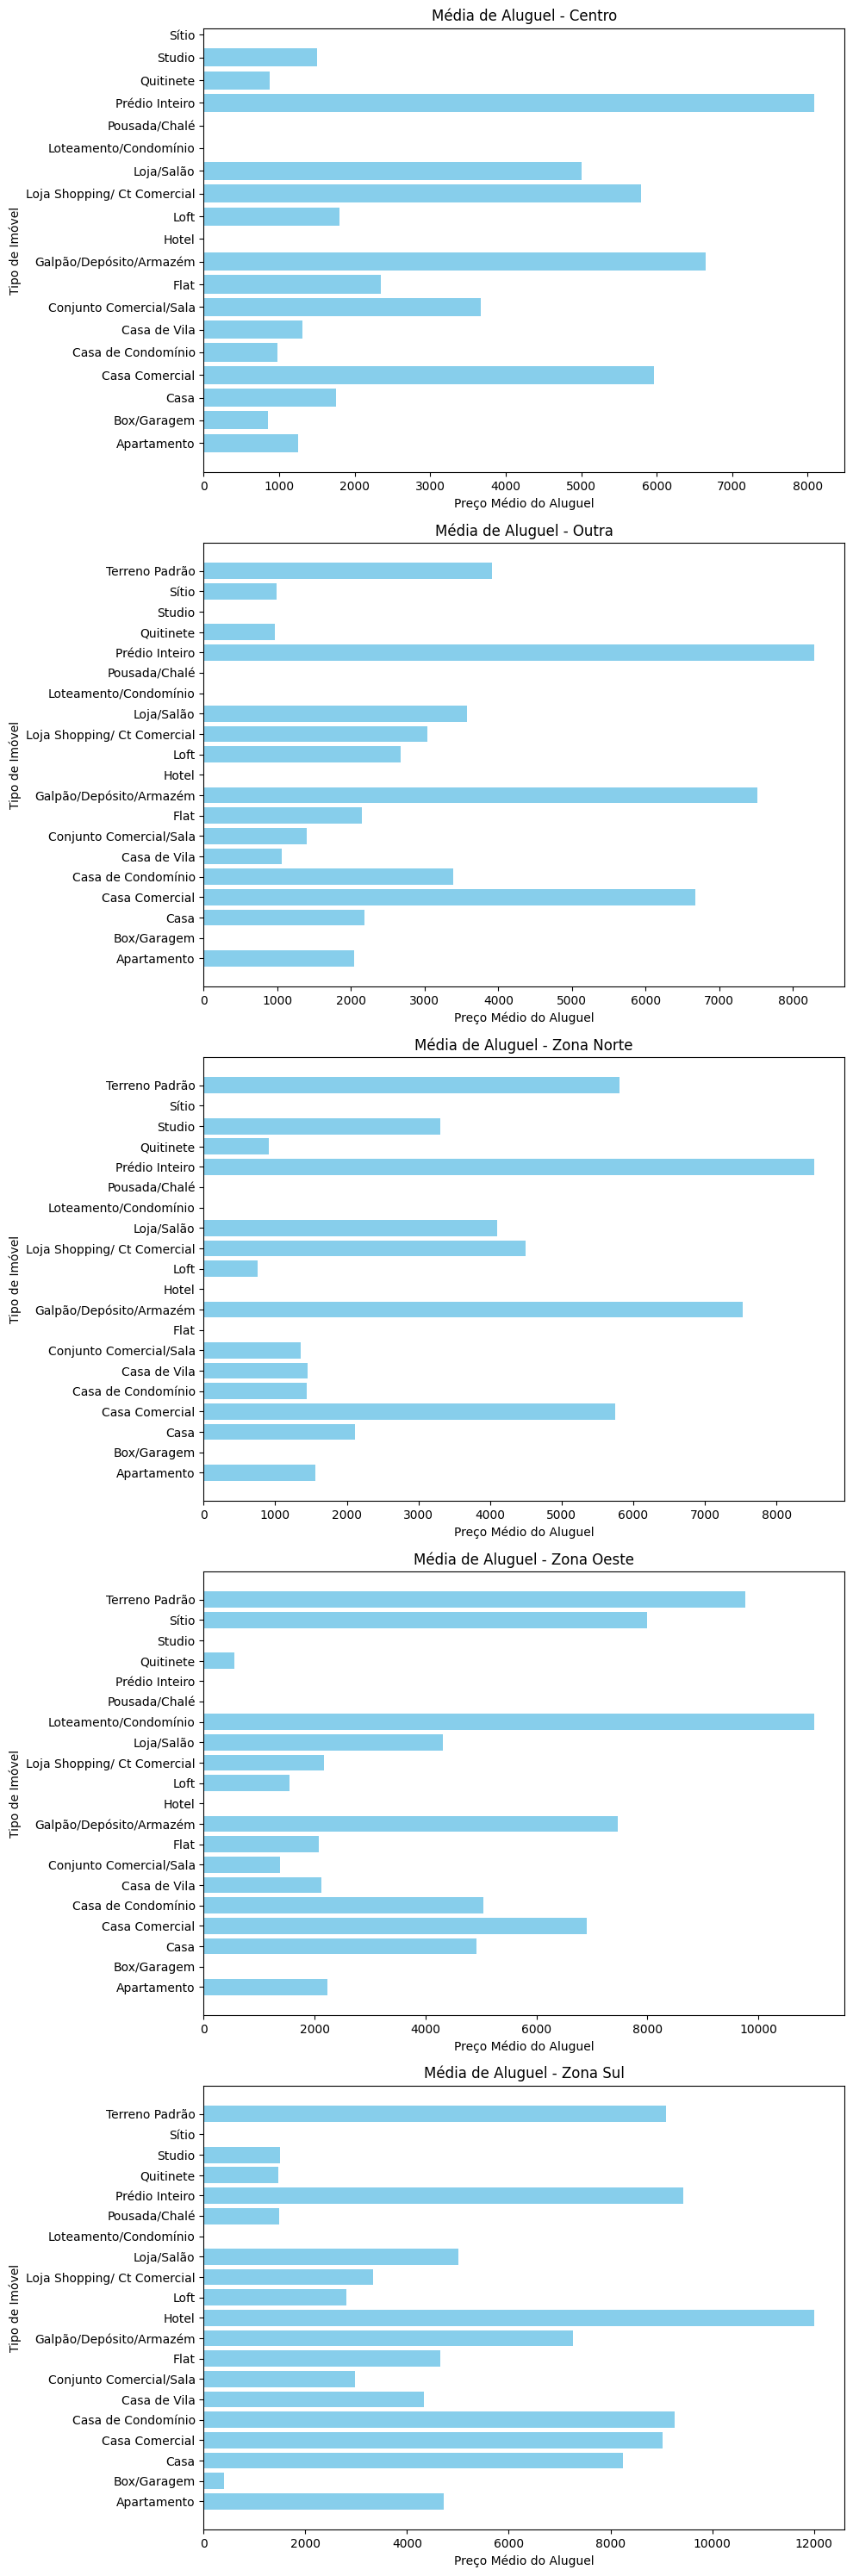

In [79]:
fig, axes = plt.subplots(len(aluguelporTipoeRegiao), 1, figsize=(10, 6 * len(aluguelporTipoeRegiao)))

if len(aluguelporTipoeRegiao) == 1:
    axes = [axes]

for i, regiao in enumerate(aluguelporTipoeRegiao.index):
    axes[i].barh(aluguelporTipoeRegiao.columns, aluguelporTipoeRegiao.loc[regiao], color='skyblue')
    axes[i].set_title(f'Média de Aluguel - {regiao}')
    axes[i].set_xlabel('Preço Médio do Aluguel')
    axes[i].set_ylabel('Tipo de Imóvel')

plt.tight_layout()
plt.show()


### De que maneira a proximidade de estações de metrô afeta o preço do aluguel?

In [80]:
bairrosComMetro = [
    "Copacabana", "Jardim Botânico", "Centro", "Botafogo", "Tijuca", "Leblon",
    "Ipanema", "Flamengo", "Largo do Machado", "Glória", "São Francisco Xavier",
    "Engenho de Dentro", "São Conrado", "Arpoador", "Laranjeiras", "Catete", 
    "Urca", "Cidade Nova", "Santa Teresa", "Cinelândia"
]

df['Tem metrô'] = df['Bairro'].apply(lambda x: 'Sim' if x in bairrosComMetro else 'Não')
df.head()



C:\Users\Eduarda\AppData\Local\Temp\ipykernel_6988\1089696883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tem metrô'] = df['Bairro'].apply(lambda x: 'Sim' if x in bairrosComMetro else 'Não')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,Valor m2,Região,Tem metrô
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,42.500000,Zona Sul,Sim
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,70.000000,Zona Sul,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,34.666667,Zona Sul,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,53.333333,Centro,Sim
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,16.666667,Outra,Não


In [88]:
dfRegiaoMetro = df.groupby(['Região', 'Tem metrô'])['Valor'].mean().reset_index()
dfRegiaoMetro

,Região,Tem metrô,Valor
0,Centro,Não,1655.596401
1,Centro,Sim,3455.470268
2,Outra,Não,2127.391826
3,Outra,Sim,3662.013722
4,Zona Norte,Não,1802.210254
5,Zona Norte,Sim,2134.988550
6,Zona Oeste,Não,2544.887360
7,Zona Sul,Não,4289.987228
8,Zona Sul,Sim,4618.304548


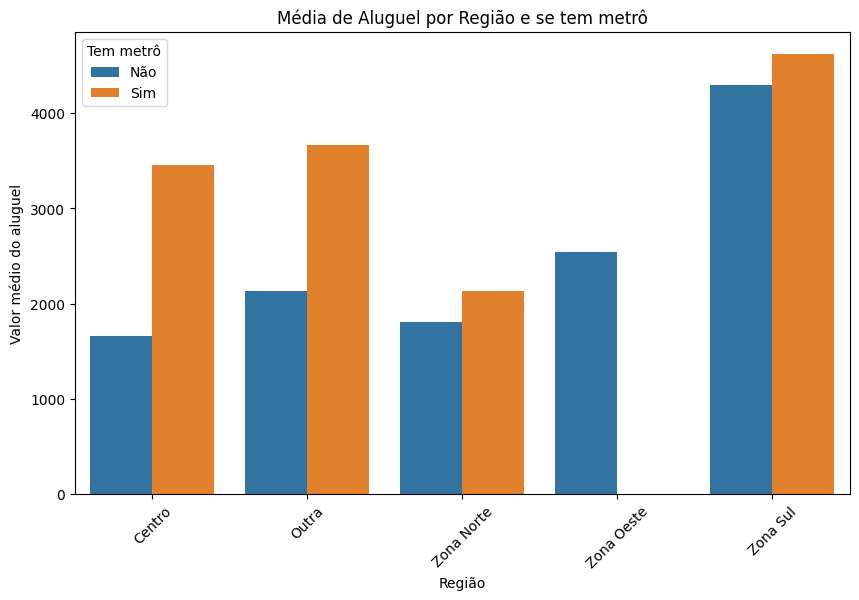

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x='Região', y='Valor', hue='Tem metrô', data=dfRegiaoMetro)
plt.title('Média de Aluguel por Região e se tem metrô')
plt.xlabel('Região')
plt.ylabel('Valor médio do aluguel')
plt.xticks(rotation=45)
plt.legend(title='Tem metrô', loc='upper left')
plt.show()

### Há diferenças de preço entre imóveis residenciais e comerciais dentro da mesma região?

In [98]:
residenciais = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat', 'Casa de Vila', 'Loft', 'Sítio', 'Pousada/Chalé', 'Studio', 'Loteamento/Condomínio']

def classificar_tipo(tipo):
    if tipo in residenciais:
        return 'Residencial'
    else:
        return 'Comercial' 

df['Classificação Tipo'] = df['Tipo'].apply(classificar_tipo)

df.head()


C:\Users\Eduarda\AppData\Local\Temp\ipykernel_6988\2039930066.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classificação Tipo'] = df['Tipo'].apply(classificar_tipo)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,Valor m2,Região,Tem metrô,Classificação Tipo
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,42.500000,Zona Sul,Sim,Residencial
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,70.000000,Zona Sul,Sim,Residencial
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,34.666667,Zona Sul,Não,Comercial
3,Apartamento,Centro,1,0,0,15,800.0,390.0,53.333333,Centro,Sim,Residencial
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,16.666667,Outra,Não,Residencial


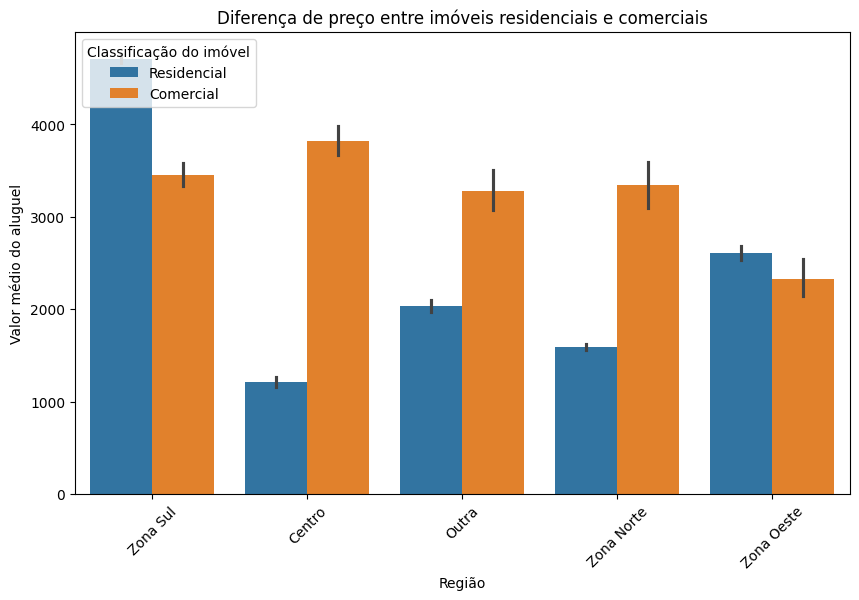

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x='Região', y='Valor', hue='Classificação Tipo', data=df)
plt.title('Diferença de preço entre imóveis residenciais e comerciais')
plt.xlabel('Região')
plt.ylabel('Valor médio do aluguel')
plt.xticks(rotation=45)
plt.legend(title='Classificação do imóvel', loc='upper left')
plt.show()